# Esercizio 09.1
L'esercizio richiede di risolvere il $TSP$ (problema del commesso viaggiatore), minimizzando il percorso attraverso $34$ città in 2 casi:
- città disposte su una circonferenza di raggio unitario;
- città disposte entro un quadrato di lato $2$.

Il problema è risolto attraverso l'algoritmo genetico che opera per step:
1) inizializzazione della popolazione, in questo caso con $100$ individui;
2) calcolo della fitness di ogni individuo, in questo caso:
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
cioè il modulo della distanza fra le $34$ città;
4) elitismo: in questo caso i migliori $5$ individui per generazione vengono preservati e passati alla generazione successiva;
5) selezione degli individui migliori attraverso un operatore di selezione;
6) crossover e mutazioni per introdurre variabilità genetica;
7) sostituzione dei nuovi individui nella nuova popolazione.

Si ripete il ciclo per un certo numero di generazioni e si ottiene il percorso che minimizza la distanza.

**Città su circonferenza unitaria**

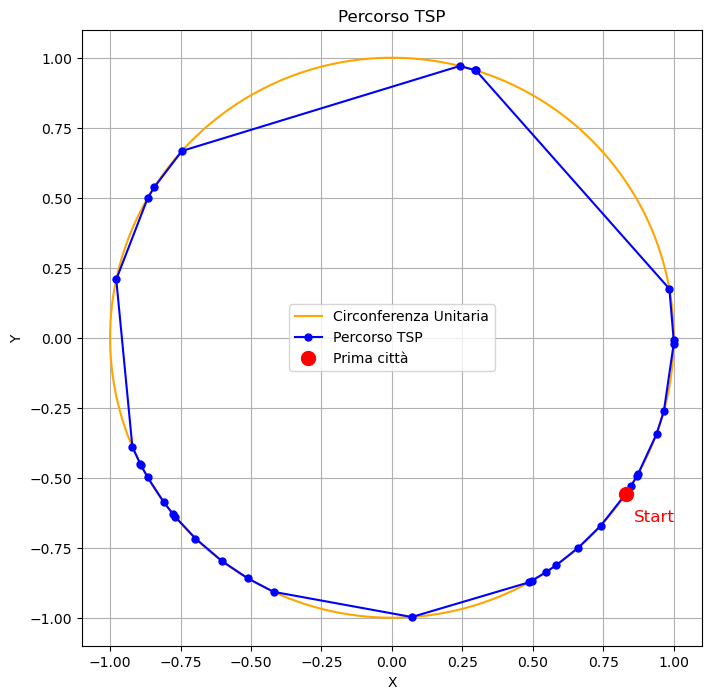

<Figure size 640x480 with 0 Axes>

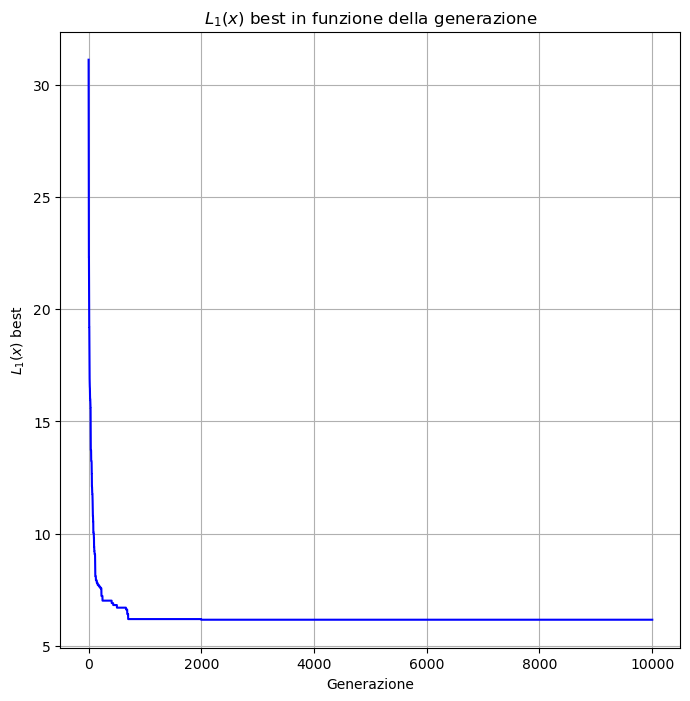

<Figure size 640x480 with 0 Axes>

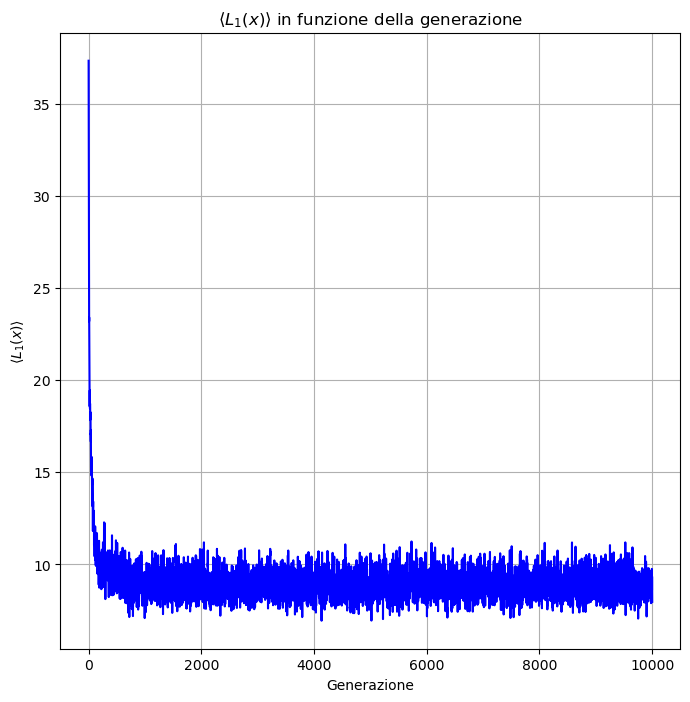

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#carico i dati
data = np.loadtxt("circonferenza/best_path_cartesian_coordinates.dat", comments="#")
x = data[:,1]
y = data[:,2]
#aggiungo la prima città all'ultimo posto per chiudere il percorso nel grafico
x = np.append(x, x[0])
y = np.append(y, y[0])

#genero la circonferenza unitaria
theta = np.linspace(0, 2 * np.pi, 1000)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

#creo il grafico
plt.figure(figsize=(8, 8))
#plotto la circonferenza unitaria
plt.plot(circle_x, circle_y, '-', color='orange', label='Circonferenza Unitaria')
#plotto la soluazione del TSP
plt.plot(x, y, '-o', color='blue', markersize=5, label='Percorso TSP')
#evidenzio la città iniziale e finale del percorso
plt.plot(x[0], y[0], 'ro', markersize=10, label='Prima città')
plt.text(x[0]+0.10, y[0] - 0.10, 'Start', color='red', ha='center', fontsize=12)
plt.title("Percorso TSP")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

plt.clf()

#carico i dati
data1 = np.loadtxt("circonferenza/best_path.dat", comments="#")
x1 = data1[:,0]
y1 = data1[:,1]

#creo il grafico
plt.figure(figsize=(8, 8))
plt.plot(x1, y1, '-', color='blue')
plt.title(r"$L_1(x)$ best in funzione della generazione")
plt.xlabel("Generazione")
plt.ylabel(r"$L_1(x)$ best")
plt.grid(True)
plt.show()

plt.clf()

#carico i dati
data2 = np.loadtxt("circonferenza/best_path_half_population.dat", comments="#")
x2 = data2[:,0]
y2 = data2[:,1]

#creo il grafico
plt.figure(figsize=(8, 8))
plt.plot(x2, y2, '-', color='blue')
plt.title(r"$\langle L_1(x) \rangle$ in funzione della generazione")
plt.xlabel("Generazione")
plt.ylabel(r"$\langle L_1(x) \rangle$")
plt.grid(True)
plt.show()



**Città entro un quadrato di lato $2$**

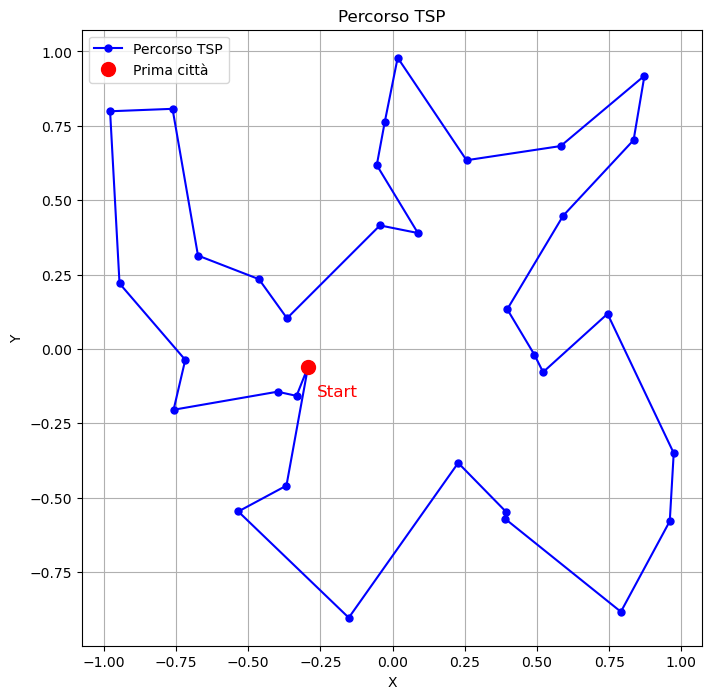

<Figure size 640x480 with 0 Axes>

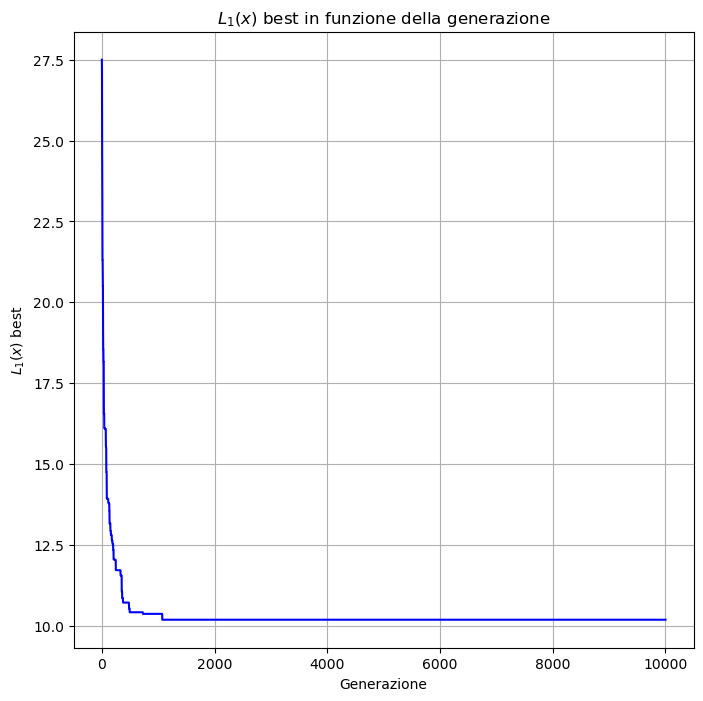

<Figure size 640x480 with 0 Axes>

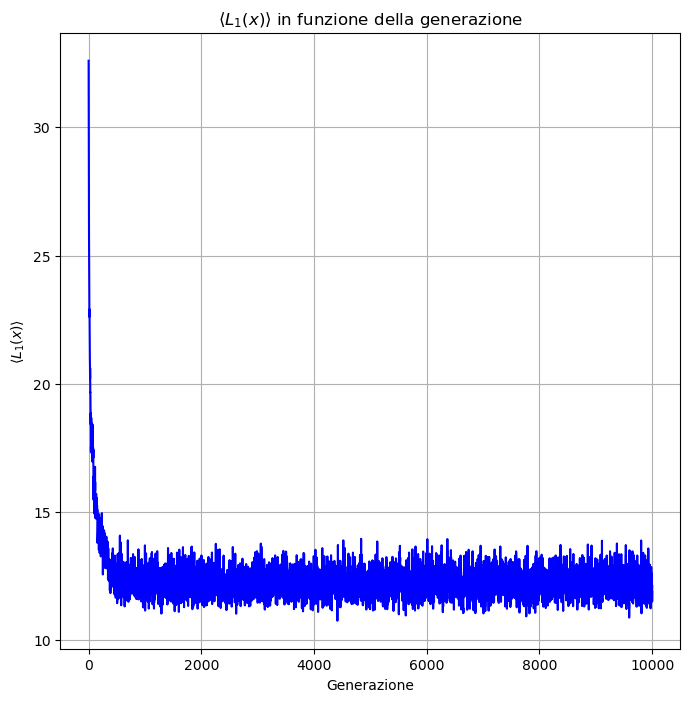

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#carico i dati
data = np.loadtxt("quadrato/best_path_cartesian_coordinates.dat", comments="#")
x = data[:,1]
y = data[:,2]
#aggiungo la prima città all'ultimo posto per chiudere il percorso nel grafico
x = np.append(x, x[0])
y = np.append(y, y[0])

#creo il grafico
plt.figure(figsize=(8, 8))
#plotto la soluzione del TSP
plt.plot(x, y, '-o', color='blue', markersize=5, label='Percorso TSP')
#evidenzio la città iniziale e finale del percorso
plt.plot(x[0], y[0], 'ro', markersize=10, label='Prima città')
plt.text(x[0]+0.10, y[0] - 0.10, 'Start', color='red', ha='center', fontsize=12)
plt.title("Percorso TSP")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

plt.clf()

#carico i dati
data1 = np.loadtxt("quadrato/best_path.dat", comments="#")
x1 = data1[:,0]
y1 = data1[:,1]

#creo il grafico
plt.figure(figsize=(8, 8))
plt.plot(x1, y1, '-', color='blue')
plt.title(r"$L_1(x)$ best in funzione della generazione")
plt.xlabel("Generazione")
plt.ylabel(r"$L_1(x)$ best")
plt.grid(True)
plt.show()

plt.clf()

#carico i dati
data2 = np.loadtxt("quadrato/best_path_half_population.dat", comments="#")
x2 = data2[:,0]
y2 = data2[:,1]

#creo il grafico
plt.figure(figsize=(8, 8))
plt.plot(x2, y2, '-', color='blue')
plt.title(r"$\langle L_1(x) \rangle$ in funzione della generazione")
plt.xlabel("Generazione")
plt.ylabel(r"$\langle L_1(x) \rangle$")
plt.grid(True)
plt.show()



## Analisi e commento
### 1) Miglior percorso trovato
In entrambi i $TSP$ il miglior percorso trovato presenta tratti che non si intersecano fra loro, costituendo dunque la soluzione matematicamente ottimale del problema. La forma ordinata del percorso e l'assenza di "zig-zag" o salti bruschi testimonia la convergenza verso il miglior percorso possibile.

### 2) Andamento di $L_1(x)$ del miglior individuo
In entrambi i TSP si osserva una discesa esponenziale di $L_1(x)$ durante le prime $1000-1500$ generazioni seguita da una fase di stallo con variazioni limitate di $L_1(x)$. Questo comportamento indica che l'algoritmo tende velocemente all'intorno del minimo di $L_1(x)$, ma rischia di ristagnare in soluzioni sub-ottimali per molte generazioni. Questo effetto si può risolvere aumentando il numero di generazioni o aumentando le probabilità di crossover e soprattutto di mutazioni, stimolando una maggiore esplorazione dello spazio delle soluzioni e favorendo l'uscita da minimi locali.

### 3) Andamento di $\langle L_1(x)\rangle$ in funzione della generazione
$\langle L_1(x)\rangle$ è calcolato sulla metà migliore della popolazione e rappresenta un indicatore della fitness media degli individui.
Anche in questo caso si osserva una forte decrescita per le prime $1000-1500$ generazioni. Successivamente, durante la fase di stagnazione di $L_1(x)$ del miglior individuo, $\langle L_1(x)\rangle$ presenta forti fluttuazioni intorno a un valore di minimo. Queste oscillazioni sono causate dalle continue mutazioni applicate agli individui della popolazione, che introducono variazioni significative nella fitness, pur mantenendo la media globale vicina al minimo.
Ciò evidenzia un equilibrio tra esplorazione (mutazioni) e convergenza (selezione), utile per evitare che l’intero sistema si blocchi prematuramente in un ottimo locale.

## Osservazioni e conclusioni
In generale, anche cambiando la posizione delle città nei due $TSP$, si osserva una convergenza verso il valore minimo della lunghezza del percorso dopo circa $3000-4000$ generazioni, confermando l'efficienza dell'algoritmo genetico nella risoluzione di $TSP$ di media complessità, con performance migliori al diminuire della difficoltà del problema.
In particolare, si nota una convergenza più rapida verso la soluzione ottimale nel caso di città disposte su una circonferenza, rispetto al caso in cui le città sono distribuite casualmente all’interno di un quadrato. Questo è probabilmente dovuto alla maggiore regolarità geometrica del primo caso, che ne riduce la complessità.

E' importante scegliere attentamente le probabilità di crossover e mutazioni. In questo caso la probabilità di crossover è pari al $50%$ mentre quella di mutazioni è pari al $20%$. Un valore elevato della probabilità di mutazione favorisce l’esplorazione dello spazio delle soluzioni e può aiutare a sfuggire da minimi locali, ma tende a rallentare la convergenza verso l’ottimo globale.
Al contrario, un valore troppo basso limita l’esplorazione, aumentando il rischio di convergenza prematura e stagnazione in soluzioni sub-ottimali.
È quindi fondamentale trovare un equilibrio tra esplorazione (mutazioni) e selezione delle soluzioni migliori, adattando i parametri in base al problema.